## K-means Clustering
LSSTC-DSFP Session 2 Final Project 

Eve Chase and George Vejar

This is a markdown cell describing what we know about K-means clustering.

## Improvements to `scikit-learn`



<img src="scikit_total.png">

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py



In [1]:
import matplotlib

In [2]:
matplotlib.__version__

'2.0.0'

In [3]:
import sklearn
sklearn.__version__

'0.18.1'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd


from sklearn.cluster import KMeans
from sklearn import datasets

In [5]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
#iris = sns.load_dataset("iris")
X = iris.data
y = iris.target

#estimators = {'k_means_iris_3': KMeans(n_clusters=3)} #,
             # 'k_means_iris_8': KMeans(n_clusters=8),
             # 'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
             #                                 init='random')}

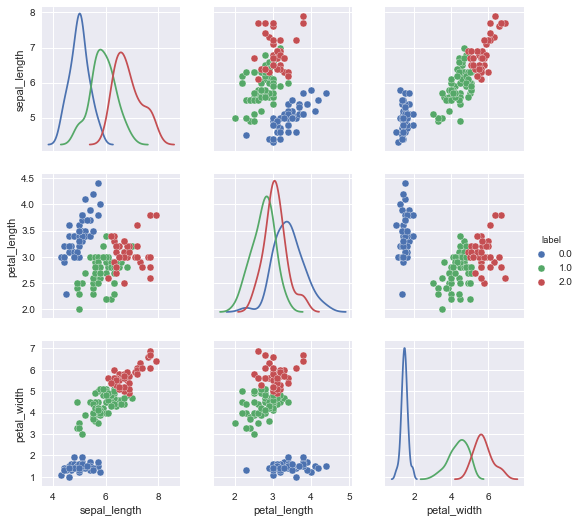

In [10]:
# 3 Clusters
est3 = KMeans(n_clusters=3)
est3.fit(X)
labels = est3.labels_
 
X_labels = []
for i, line in enumerate(X):
    X_labels.append([line[0], line[1], line[2], labels[i]])
X_labels = np.asarray(X_labels)

plt.figure(1, figsize=(12, 9))
fit_data = pd.DataFrame(X_labels, columns=['sepal_length', 'petal_length', 'petal_width',
                                          'label'])
sns.pairplot(fit_data, vars=['sepal_length', 'petal_length', 'petal_width'], hue='label', diag_kind='kde')
plt.show()


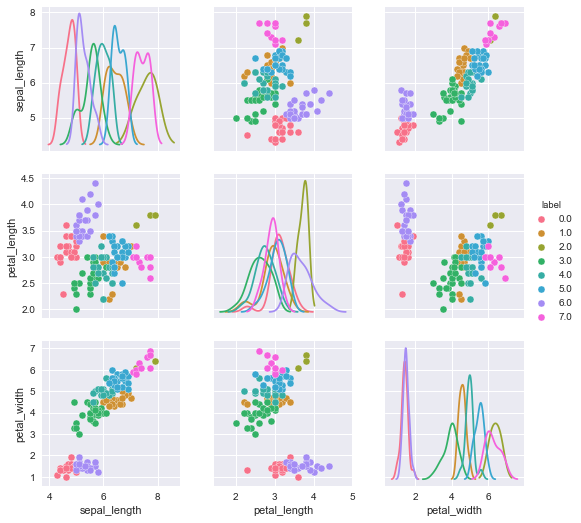

In [12]:
#  8 Clusters
est3 = KMeans(n_clusters=8)
est3.fit(X)
labels = est3.labels_
 
X_labels = []
for i, line in enumerate(X):
    X_labels.append([line[0], line[1], line[2], labels[i]])
X_labels = np.asarray(X_labels)

plt.figure(1, figsize=(12, 9))
fit_data = pd.DataFrame(X_labels, columns=['sepal_length', 'petal_length', 'petal_width',
                                          'label'])
sns.pairplot(fit_data, vars=['sepal_length', 'petal_length', 'petal_width'], hue='label', diag_kind='kde')
plt.show()

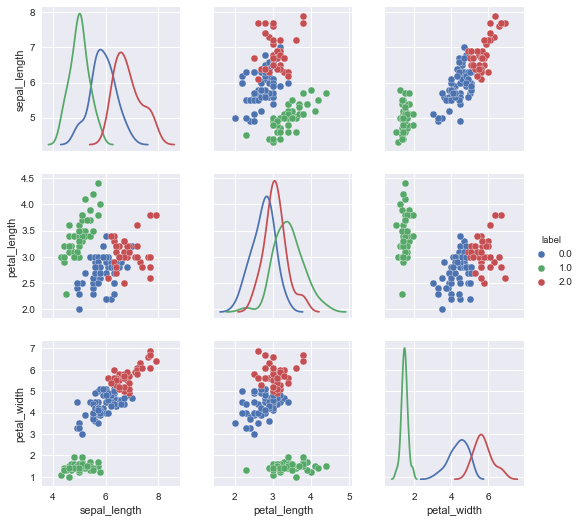

In [13]:
# 3 Clusters with "bad init"
est3 = KMeans(n_clusters=3, n_init=1, init='random')
est3.fit(X)
labels = est3.labels_
 
X_labels = []
for i, line in enumerate(X):
    X_labels.append([line[0], line[1], line[2], labels[i]])
X_labels = np.asarray(X_labels)

plt.figure(1, figsize=(12, 9))
fit_data = pd.DataFrame(X_labels, columns=['sepal_length', 'petal_length', 'petal_width',
                                          'label'])
sns.pairplot(fit_data, vars=['sepal_length', 'petal_length', 'petal_width'], hue='label', diag_kind='kde')
plt.show()